<h2><font size="3" color="#008B8B"><strong>Principais objetivos: </strong></font></h2>
<ul>
    <li><font size="2" color="#1f77b4">Remover valores extremos.</font></li>
    <li><font size="2" color="#1f77b4">Remover colunas nao utilizadas.</font></li>
    <li><font size="2" color="#1f77b4">Remover medidores que nao funcionam.</font></li>
    <li><font size="2" color="#1f77b4">Alterar valores de colunas de medidores com TCs invertidos.</font></li>
    <li><font size="2" color="#1f77b4">Agrupar coletas por minuto (arredondar para baixo).</font></li>
    <li><font size="2" color="#1f77b4">Salvar em arquivo csv para posterior análise.</font></li>
</ul>

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
# jupyter notebook settings

dark_orange = "#FF8C00"
dark_cyan = "#008B8B"
dark_slate = "#2F4F4F"
golden_rod = "#DAA520"
dark_golden_rod = "#B8860B"


In [3]:
# Helper functions

def check_duplicated_rows(df):
    duplicated_rows = df[df.index.duplicated(keep=False)]
    if duplicated_rows.shape[0] > 0:
        print(f"\t> Duplicated rows: {duplicated_rows.shape[0]}")
        display(duplicated_rows)
        return True
    else:
        print("\t> No duplicated rows..")
        return False


def drop_duplicated_rows(df):
    return df[~df.index.duplicated(keep="first")]

In [4]:
file_path = "../data/raw/production_sige_pt15m.csv"

raw_df = pd.read_csv(file_path, parse_dates=True, index_col="date_time")
raw_df.drop(columns=["transductor_ip"], inplace=True)
raw_df.index = raw_df.index.floor("min")

print(f"Shape: {raw_df.shape}")
print(f"Interval: {raw_df.index.min()} - {raw_df.index.max()}")
display(raw_df.head())
display(raw_df.describe())

Shape: (348116, 5)
Interval: 2023-05-29 21:15:00-03:00 - 2024-07-06 08:15:00-03:00


active_consumption  active_generated  \
date_time                                                         
2023-05-29 21:15:00-03:00                 0.0               0.0   
2023-05-29 21:30:00-03:00                 0.0               0.0   
2023-05-29 21:30:00-03:00                 0.0               0.0   
2023-05-29 21:30:00-03:00                 0.0               0.0   
2023-05-29 21:45:00-03:00                 0.0               0.0   

                           is_calculated  transductor_id building  
date_time                                                          
2023-05-29 21:15:00-03:00          False               1      UAC  
2023-05-29 21:30:00-03:00          False               2      UAC  
2023-05-29 21:30:00-03:00          False               1      UAC  
2023-05-29 21:30:00-03:00          False               3      UED  
2023-05-29 21:45:00-03:00          False               2      UAC

active_consumption  active_generated  transductor_id
count       348116.000000     348116.000000   348116.000000
mean             0.400981          2.568133        5.000822
std              1.366156        988.849975        2.581684
min              0.000000    -174248.580000        1.000000
25%              0.000000          0.000000        3.000000
50%              0.000000          0.000000        5.000000
75%              0.000000          0.180000        7.000000
max             16.240000     174325.950000        9.000000

In [5]:
grouped_df = raw_df.groupby("transductor_id")

cleaned_dfs = []
for name, group in grouped_df:
    building = group["building"].unique()
    print(f"\nBuilding: {building} - Transductor id: {name} - shape: {group.shape}")

    if check_duplicated_rows(group):
        group = drop_duplicated_rows(group)
        print(f"Shape after drop: {group.shape}")
    cleaned_dfs.append(group)
cleaned_df = pd.concat(cleaned_dfs)


Building: ['UAC'] - Transductor id: 1 - shape: (38659, 5)
	> Duplicated rows: 10


active_consumption  active_generated  \
date_time                                                         
2024-06-25 19:15:00-03:00                0.00               0.0   
2024-06-25 19:15:00-03:00                1.10               0.0   
2024-06-28 11:00:00-03:00                5.41               0.0   
2024-06-28 11:00:00-03:00                5.15               0.0   
2024-07-01 16:00:00-03:00                2.37               0.0   
2024-07-01 16:00:00-03:00                0.90               0.0   
2024-07-02 13:30:00-03:00                5.69               0.0   
2024-07-02 13:30:00-03:00                3.33               0.0   
2024-07-03 09:30:00-03:00                4.23               0.0   
2024-07-03 09:30:00-03:00                4.72               0.0   

                           is_calculated  transductor_id building  
date_time                                                          
2024-06-25 19:15:00-03:00          False               1      UAC  
2024-06-25 19:15:00-03:00           True               1      UAC  
2024-06-28 11:00:00-03:00          False               1      UAC  
2024-06-28 11:00:00-03:00           True               1      UAC  
2024-07-01 16:00:00-03:00          False               1      UAC  
2024-07-01 16:00:00-03:00           True               1      UAC  
2024-07-02 13:30:00-03:00          False               1      UAC  
2024-07-02 13:30:00-03:00           True               1      UAC  
2024-07-03 09:30:00-03:00          False               1      UAC  
2024-07-03 09:30:00-03:00           True               1      UAC

Shape after drop: (38654, 5)

Building: ['UAC'] - Transductor id: 2 - shape: (38655, 5)
	> Duplicated rows: 10


active_consumption  active_generated  \
date_time                                                         
2024-06-25 19:15:00-03:00                0.00               0.0   
2024-06-25 19:15:00-03:00                1.29               0.0   
2024-06-28 11:00:00-03:00                6.51               0.0   
2024-06-28 11:00:00-03:00                6.30               0.0   
2024-07-01 16:00:00-03:00                2.96               0.0   
2024-07-01 16:00:00-03:00                1.11               0.0   
2024-07-02 13:30:00-03:00                6.84               0.0   
2024-07-02 13:30:00-03:00                4.06               0.0   
2024-07-03 09:30:00-03:00                4.93               0.0   
2024-07-03 09:30:00-03:00                5.52               0.0   

                           is_calculated  transductor_id building  
date_time                                                          
2024-06-25 19:15:00-03:00          False               2      UAC  
2024-06-25 19:15:00-03:00           True               2      UAC  
2024-06-28 11:00:00-03:00          False               2      UAC  
2024-06-28 11:00:00-03:00           True               2      UAC  
2024-07-01 16:00:00-03:00          False               2      UAC  
2024-07-01 16:00:00-03:00           True               2      UAC  
2024-07-02 13:30:00-03:00          False               2      UAC  
2024-07-02 13:30:00-03:00           True               2      UAC  
2024-07-03 09:30:00-03:00          False               2      UAC  
2024-07-03 09:30:00-03:00           True               2      UAC

Shape after drop: (38650, 5)

Building: ['UED'] - Transductor id: 3 - shape: (38662, 5)
	> Duplicated rows: 8


active_consumption  active_generated  \
date_time                                                         
2024-06-25 19:15:00-03:00                 0.0              0.00   
2024-06-25 19:15:00-03:00                 0.0              0.06   
2024-06-28 11:00:00-03:00                 0.0              0.31   
2024-06-28 11:00:00-03:00                 0.0              0.29   
2024-07-01 16:00:00-03:00                 0.0              0.12   
2024-07-01 16:00:00-03:00                 0.0              0.03   
2024-07-02 13:30:00-03:00                 0.0              0.32   
2024-07-02 13:30:00-03:00                 0.0              0.17   

                           is_calculated  transductor_id building  
date_time                                                          
2024-06-25 19:15:00-03:00          False               3      UED  
2024-06-25 19:15:00-03:00           True               3      UED  
2024-06-28 11:00:00-03:00          False               3      UED  
2024-06-28 11:00:00-03:00           True               3      UED  
2024-07-01 16:00:00-03:00          False               3      UED  
2024-07-01 16:00:00-03:00           True               3      UED  
2024-07-02 13:30:00-03:00          False               3      UED  
2024-07-02 13:30:00-03:00           True               3      UED

Shape after drop: (38658, 5)

Building: ['UED'] - Transductor id: 4 - shape: (38663, 5)
	> Duplicated rows: 18


active_consumption  active_generated  \
date_time                                                         
2023-10-31 18:00:00-03:00                0.00               0.0   
2023-10-31 18:00:00-03:00                0.00               0.0   
2023-10-31 18:15:00-03:00                0.00               0.0   
2023-10-31 18:15:00-03:00                0.00               0.0   
2023-10-31 18:30:00-03:00                0.00               0.0   
2023-10-31 18:30:00-03:00                0.00               0.0   
2023-10-31 18:45:00-03:00                0.00               0.0   
2023-10-31 18:45:00-03:00                0.00               0.0   
2023-10-31 19:00:00-03:00                0.00               0.0   
2023-10-31 19:00:00-03:00                0.00               0.0   
2024-06-25 19:15:00-03:00                0.00               0.0   
2024-06-25 19:15:00-03:00                0.04               0.0   
2024-06-28 11:00:00-03:00                0.20               0.0   
2024-06-28 11:00:00-03:00                0.19               0.0   
2024-07-01 16:00:00-03:00                0.08               0.0   
2024-07-01 16:00:00-03:00                0.00               0.0   
2024-07-02 13:30:00-03:00                0.20               0.0   
2024-07-02 13:30:00-03:00                0.11               0.0   

                           is_calculated  transductor_id building  
date_time                                                          
2023-10-31 18:00:00-03:00           True               4      UED  
2023-10-31 18:00:00-03:00           True               4      UED  
2023-10-31 18:15:00-03:00           True               4      UED  
2023-10-31 18:15:00-03:00           True               4      UED  
2023-10-31 18:30:00-03:00           True               4      UED  
2023-10-31 18:30:00-03:00           True               4      UED  
2023-10-31 18:45:00-03:00           True               4      UED  
2023-10-31 18:45:00-03:00           True               4      UED  
2023-10-31 19:00:00-03:00           True               4      UED  
2023-10-31 19:00:00-03:00           True               4      UED  
2024-06-25 19:15:00-03:00          False               4      UED  
2024-06-25 19:15:00-03:00           True               4      UED  
2024-06-28 11:00:00-03:00          False               4      UED  
2024-06-28 11:00:00-03:00           True               4      UED  
2024-07-01 16:00:00-03:00          False               4      UED  
2024-07-01 16:00:00-03:00           True               4      UED  
2024-07-02 13:30:00-03:00          False               4      UED  
2024-07-02 13:30:00-03:00           True               4      UED

Shape after drop: (38654, 5)

Building: ['LDTEA'] - Transductor id: 5 - shape: (38704, 5)
	> Duplicated rows: 8


active_consumption  active_generated  \
date_time                                                         
2024-06-25 19:15:00-03:00                 0.0              0.00   
2024-06-25 19:15:00-03:00                 0.0              0.99   
2024-06-28 11:00:00-03:00                 0.0              4.43   
2024-06-28 11:00:00-03:00                 0.0              3.41   
2024-07-01 16:00:00-03:00                 0.0              1.00   
2024-07-01 16:00:00-03:00                 0.0              0.44   
2024-07-02 13:30:00-03:00                 0.0              3.84   
2024-07-02 13:30:00-03:00                 0.0              1.60   

                           is_calculated  transductor_id building  
date_time                                                          
2024-06-25 19:15:00-03:00          False               5    LDTEA  
2024-06-25 19:15:00-03:00           True               5    LDTEA  
2024-06-28 11:00:00-03:00          False               5    LDTEA  
2024-06-28 11:00:00-03:00           True               5    LDTEA  
2024-07-01 16:00:00-03:00          False               5    LDTEA  
2024-07-01 16:00:00-03:00           True               5    LDTEA  
2024-07-02 13:30:00-03:00          False               5    LDTEA  
2024-07-02 13:30:00-03:00           True               5    LDTEA

Shape after drop: (38700, 5)

Building: ['LDTEA'] - Transductor id: 6 - shape: (38704, 5)
	> Duplicated rows: 8


active_consumption  active_generated  \
date_time                                                         
2024-06-25 19:15:00-03:00                 0.0              0.00   
2024-06-25 19:15:00-03:00                 0.0              0.98   
2024-06-28 11:00:00-03:00                 0.0              4.42   
2024-06-28 11:00:00-03:00                 0.0              3.38   
2024-07-01 16:00:00-03:00                 0.0              0.97   
2024-07-01 16:00:00-03:00                 0.0              0.44   
2024-07-02 13:30:00-03:00                 0.0              3.79   
2024-07-02 13:30:00-03:00                 0.0              1.57   

                           is_calculated  transductor_id building  
date_time                                                          
2024-06-25 19:15:00-03:00          False               6    LDTEA  
2024-06-25 19:15:00-03:00           True               6    LDTEA  
2024-06-28 11:00:00-03:00          False               6    LDTEA  
2024-06-28 11:00:00-03:00           True               6    LDTEA  
2024-07-01 16:00:00-03:00          False               6    LDTEA  
2024-07-01 16:00:00-03:00           True               6    LDTEA  
2024-07-02 13:30:00-03:00          False               6    LDTEA  
2024-07-02 13:30:00-03:00           True               6    LDTEA

Shape after drop: (38700, 5)

Building: ['LDTEA'] - Transductor id: 7 - shape: (38701, 5)
	> Duplicated rows: 8


active_consumption  active_generated  \
date_time                                                         
2024-06-25 19:15:00-03:00                 0.0              0.00   
2024-06-25 19:15:00-03:00                 0.0              0.80   
2024-06-28 11:00:00-03:00                 0.0              4.15   
2024-06-28 11:00:00-03:00                 0.0              3.87   
2024-07-01 16:00:00-03:00                 0.0              1.68   
2024-07-01 16:00:00-03:00                 0.0              0.62   
2024-07-02 13:30:00-03:00                 0.0              4.24   
2024-07-02 13:30:00-03:00                 0.0              2.33   

                           is_calculated  transductor_id building  
date_time                                                          
2024-06-25 19:15:00-03:00          False               7    LDTEA  
2024-06-25 19:15:00-03:00           True               7    LDTEA  
2024-06-28 11:00:00-03:00          False               7    LDTEA  
2024-06-28 11:00:00-03:00           True               7    LDTEA  
2024-07-01 16:00:00-03:00          False               7    LDTEA  
2024-07-01 16:00:00-03:00           True               7    LDTEA  
2024-07-02 13:30:00-03:00          False               7    LDTEA  
2024-07-02 13:30:00-03:00           True               7    LDTEA

Shape after drop: (38697, 5)

Building: ['LDTEA'] - Transductor id: 8 - shape: (38704, 5)
	> Duplicated rows: 18


active_consumption  active_generated  \
date_time                                                         
2023-10-31 18:00:00-03:00                 0.0              0.00   
2023-10-31 18:00:00-03:00                 0.0              0.00   
2023-10-31 18:15:00-03:00                 0.0              0.00   
2023-10-31 18:15:00-03:00                 0.0              0.00   
2023-10-31 18:30:00-03:00                 0.0              0.00   
2023-10-31 18:30:00-03:00                 0.0              0.00   
2023-10-31 18:45:00-03:00                 0.0              0.00   
2023-10-31 18:45:00-03:00                 0.0              0.00   
2023-10-31 19:00:00-03:00                 0.0              0.00   
2023-10-31 19:00:00-03:00                 0.0              0.00   
2024-06-25 19:15:00-03:00                 0.0              0.00   
2024-06-25 19:15:00-03:00                 0.0              0.60   
2024-06-28 11:00:00-03:00                 0.0              3.58   
2024-06-28 11:00:00-03:00                 0.0              3.88   
2024-07-01 16:00:00-03:00                 0.0              2.07   
2024-07-01 16:00:00-03:00                 0.0              0.69   
2024-07-02 13:30:00-03:00                 0.0              4.30   
2024-07-02 13:30:00-03:00                 0.0              2.70   

                           is_calculated  transductor_id building  
date_time                                                          
2023-10-31 18:00:00-03:00           True               8    LDTEA  
2023-10-31 18:00:00-03:00           True               8    LDTEA  
2023-10-31 18:15:00-03:00           True               8    LDTEA  
2023-10-31 18:15:00-03:00           True               8    LDTEA  
2023-10-31 18:30:00-03:00           True               8    LDTEA  
2023-10-31 18:30:00-03:00           True               8    LDTEA  
2023-10-31 18:45:00-03:00           True               8    LDTEA  
2023-10-31 18:45:00-03:00           True               8    LDTEA  
2023-10-31 19:00:00-03:00           True               8    LDTEA  
2023-10-31 19:00:00-03:00           True               8    LDTEA  
2024-06-25 19:15:00-03:00          False               8    LDTEA  
2024-06-25 19:15:00-03:00           True               8    LDTEA  
2024-06-28 11:00:00-03:00          False               8    LDTEA  
2024-06-28 11:00:00-03:00           True               8    LDTEA  
2024-07-01 16:00:00-03:00          False               8    LDTEA  
2024-07-01 16:00:00-03:00           True               8    LDTEA  
2024-07-02 13:30:00-03:00          False               8    LDTEA  
2024-07-02 13:30:00-03:00           True               8    LDTEA

Shape after drop: (38695, 5)

Building: ['MESP'] - Transductor id: 9 - shape: (38664, 5)
	> Duplicated rows: 8


active_consumption  active_generated  \
date_time                                                         
2024-06-25 19:15:00-03:00                 0.0               0.0   
2024-06-25 19:15:00-03:00                 0.0               0.0   
2024-06-28 11:00:00-03:00                 0.0               0.0   
2024-06-28 11:00:00-03:00                 0.0               0.0   
2024-07-01 16:00:00-03:00                 0.0               0.0   
2024-07-01 16:00:00-03:00                 0.0               0.0   
2024-07-02 13:30:00-03:00                 0.0               0.0   
2024-07-02 13:30:00-03:00                 0.0               0.0   

                           is_calculated  transductor_id building  
date_time                                                          
2024-06-25 19:15:00-03:00          False               9     MESP  
2024-06-25 19:15:00-03:00           True               9     MESP  
2024-06-28 11:00:00-03:00          False               9     MESP  
2024-06-28 11:00:00-03:00           True               9     MESP  
2024-07-01 16:00:00-03:00          False               9     MESP  
2024-07-01 16:00:00-03:00           True               9     MESP  
2024-07-02 13:30:00-03:00          False               9     MESP  
2024-07-02 13:30:00-03:00           True               9     MESP

Shape after drop: (38660, 5)


In [6]:
# Substituir valores extremos por NaN (provavelmente erros de medição)

df = cleaned_df.copy()
condition_ac = df["active_consumption"].between(-100, 100)
condition_ag = df["active_generated"].between(-100, 100)

df.loc[~condition_ac, "active_consumption"] = np.nan
df.loc[~condition_ag, "active_generated"] = np.nan
df

active_consumption  active_generated  \
date_time                                                         
2023-05-29 21:15:00-03:00                 0.0               0.0   
2023-05-29 21:30:00-03:00                 0.0               0.0   
2023-05-29 21:45:00-03:00                 0.0               0.0   
2023-05-29 22:00:00-03:00                 0.0               0.0   
2023-05-29 22:15:00-03:00                 0.0               0.0   
...                                       ...               ...   
2024-07-06 07:15:00-03:00                 0.0               0.0   
2024-07-06 07:30:00-03:00                 0.0               0.0   
2024-07-06 07:45:00-03:00                 0.0               0.0   
2024-07-06 08:00:00-03:00                 0.0               0.0   
2024-07-06 08:15:00-03:00                 0.0               0.0   

                           is_calculated  transductor_id building  
date_time                                                          
2023-05-29 21:15:00-03:00          False               1      UAC  
2023-05-29 21:30:00-03:00          False               1      UAC  
2023-05-29 21:45:00-03:00          False               1      UAC  
2023-05-29 22:00:00-03:00          False               1      UAC  
2023-05-29 22:15:00-03:00          False               1      UAC  
...                                  ...             ...      ...  
2024-07-06 07:15:00-03:00          False               9     MESP  
2024-07-06 07:30:00-03:00          False               9     MESP  
2024-07-06 07:45:00-03:00          False               9     MESP  
2024-07-06 08:00:00-03:00          False               9     MESP  
2024-07-06 08:15:00-03:00          False               9     MESP  

[348068 rows x 5 columns]

In [7]:
groups = df.groupby("transductor_id")
n_groups = len(groups)

fig, axes = plt.subplots(n_groups, 2, figsize=(22, 3 * n_groups))
for (name, group), (ax1, ax2) in zip(groups, axes):
    sns.lineplot(
        data=group,
        x=group.index,
        y="active_generated",
        ax=ax1,
        label="Active Generated",
        color=dark_cyan,
    )
    sns.lineplot(
        data=group,
        x=group.index,
        y="active_consumption",
        ax=ax2,
        label="Active Consumption",
        color=dark_golden_rod,
    )

    building = group["building"].unique()
    for ax in [ax1, ax2]:
        ax.set_title(f"{building} - Transductor: {name}", fontsize=12)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.legend(loc="upper left", fontsize=10)
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.grid(axis="y", alpha=0.7, linewidth=1)

plt.tight_layout()
plt.show()

In [8]:
# Deletar medidores com problema nas leituras ou com valores iguais a zero ou muito baixos
# Medidores: UED e MESP

to_delete = ["UED", "MESP"]
df = df[~df["building"].isin(to_delete)]
buildings = df["building"].unique()

print(df.shape)
print(f"building: {buildings}")
df.head()

(232096, 5)
building: ['UAC' 'LDTEA']


active_consumption  active_generated  \
date_time                                                         
2023-05-29 21:15:00-03:00                 0.0               0.0   
2023-05-29 21:30:00-03:00                 0.0               0.0   
2023-05-29 21:45:00-03:00                 0.0               0.0   
2023-05-29 22:00:00-03:00                 0.0               0.0   
2023-05-29 22:15:00-03:00                 0.0               0.0   

                           is_calculated  transductor_id building  
date_time                                                          
2023-05-29 21:15:00-03:00          False               1      UAC  
2023-05-29 21:30:00-03:00          False               1      UAC  
2023-05-29 21:45:00-03:00          False               1      UAC  
2023-05-29 22:00:00-03:00          False               1      UAC  
2023-05-29 22:15:00-03:00          False               1      UAC

In [9]:
# Alterar valores de colunas de medidores que estão provavelmente com TCs invertidos (geração e consumo)
# Medidores: 1 e 2 UAC (geração e consumo invertidos)

transductor_ids = [1, 2]

for transductor in transductor_ids:
    condition = df["transductor_id"] == transductor
    df.loc[condition, ["active_consumption", "active_generated"]] = df.loc[
        condition, ["active_generated", "active_consumption"]
    ].values

df.drop(columns=["active_consumption"], inplace=True)
print(df.shape)
df.head()

(232096, 4)


active_generated  is_calculated  transductor_id  \
date_time                                                                    
2023-05-29 21:15:00-03:00               0.0          False               1   
2023-05-29 21:30:00-03:00               0.0          False               1   
2023-05-29 21:45:00-03:00               0.0          False               1   
2023-05-29 22:00:00-03:00               0.0          False               1   
2023-05-29 22:15:00-03:00               0.0          False               1   

                          building  
date_time                           
2023-05-29 21:15:00-03:00      UAC  
2023-05-29 21:30:00-03:00      UAC  
2023-05-29 21:45:00-03:00      UAC  
2023-05-29 22:00:00-03:00      UAC  
2023-05-29 22:15:00-03:00      UAC

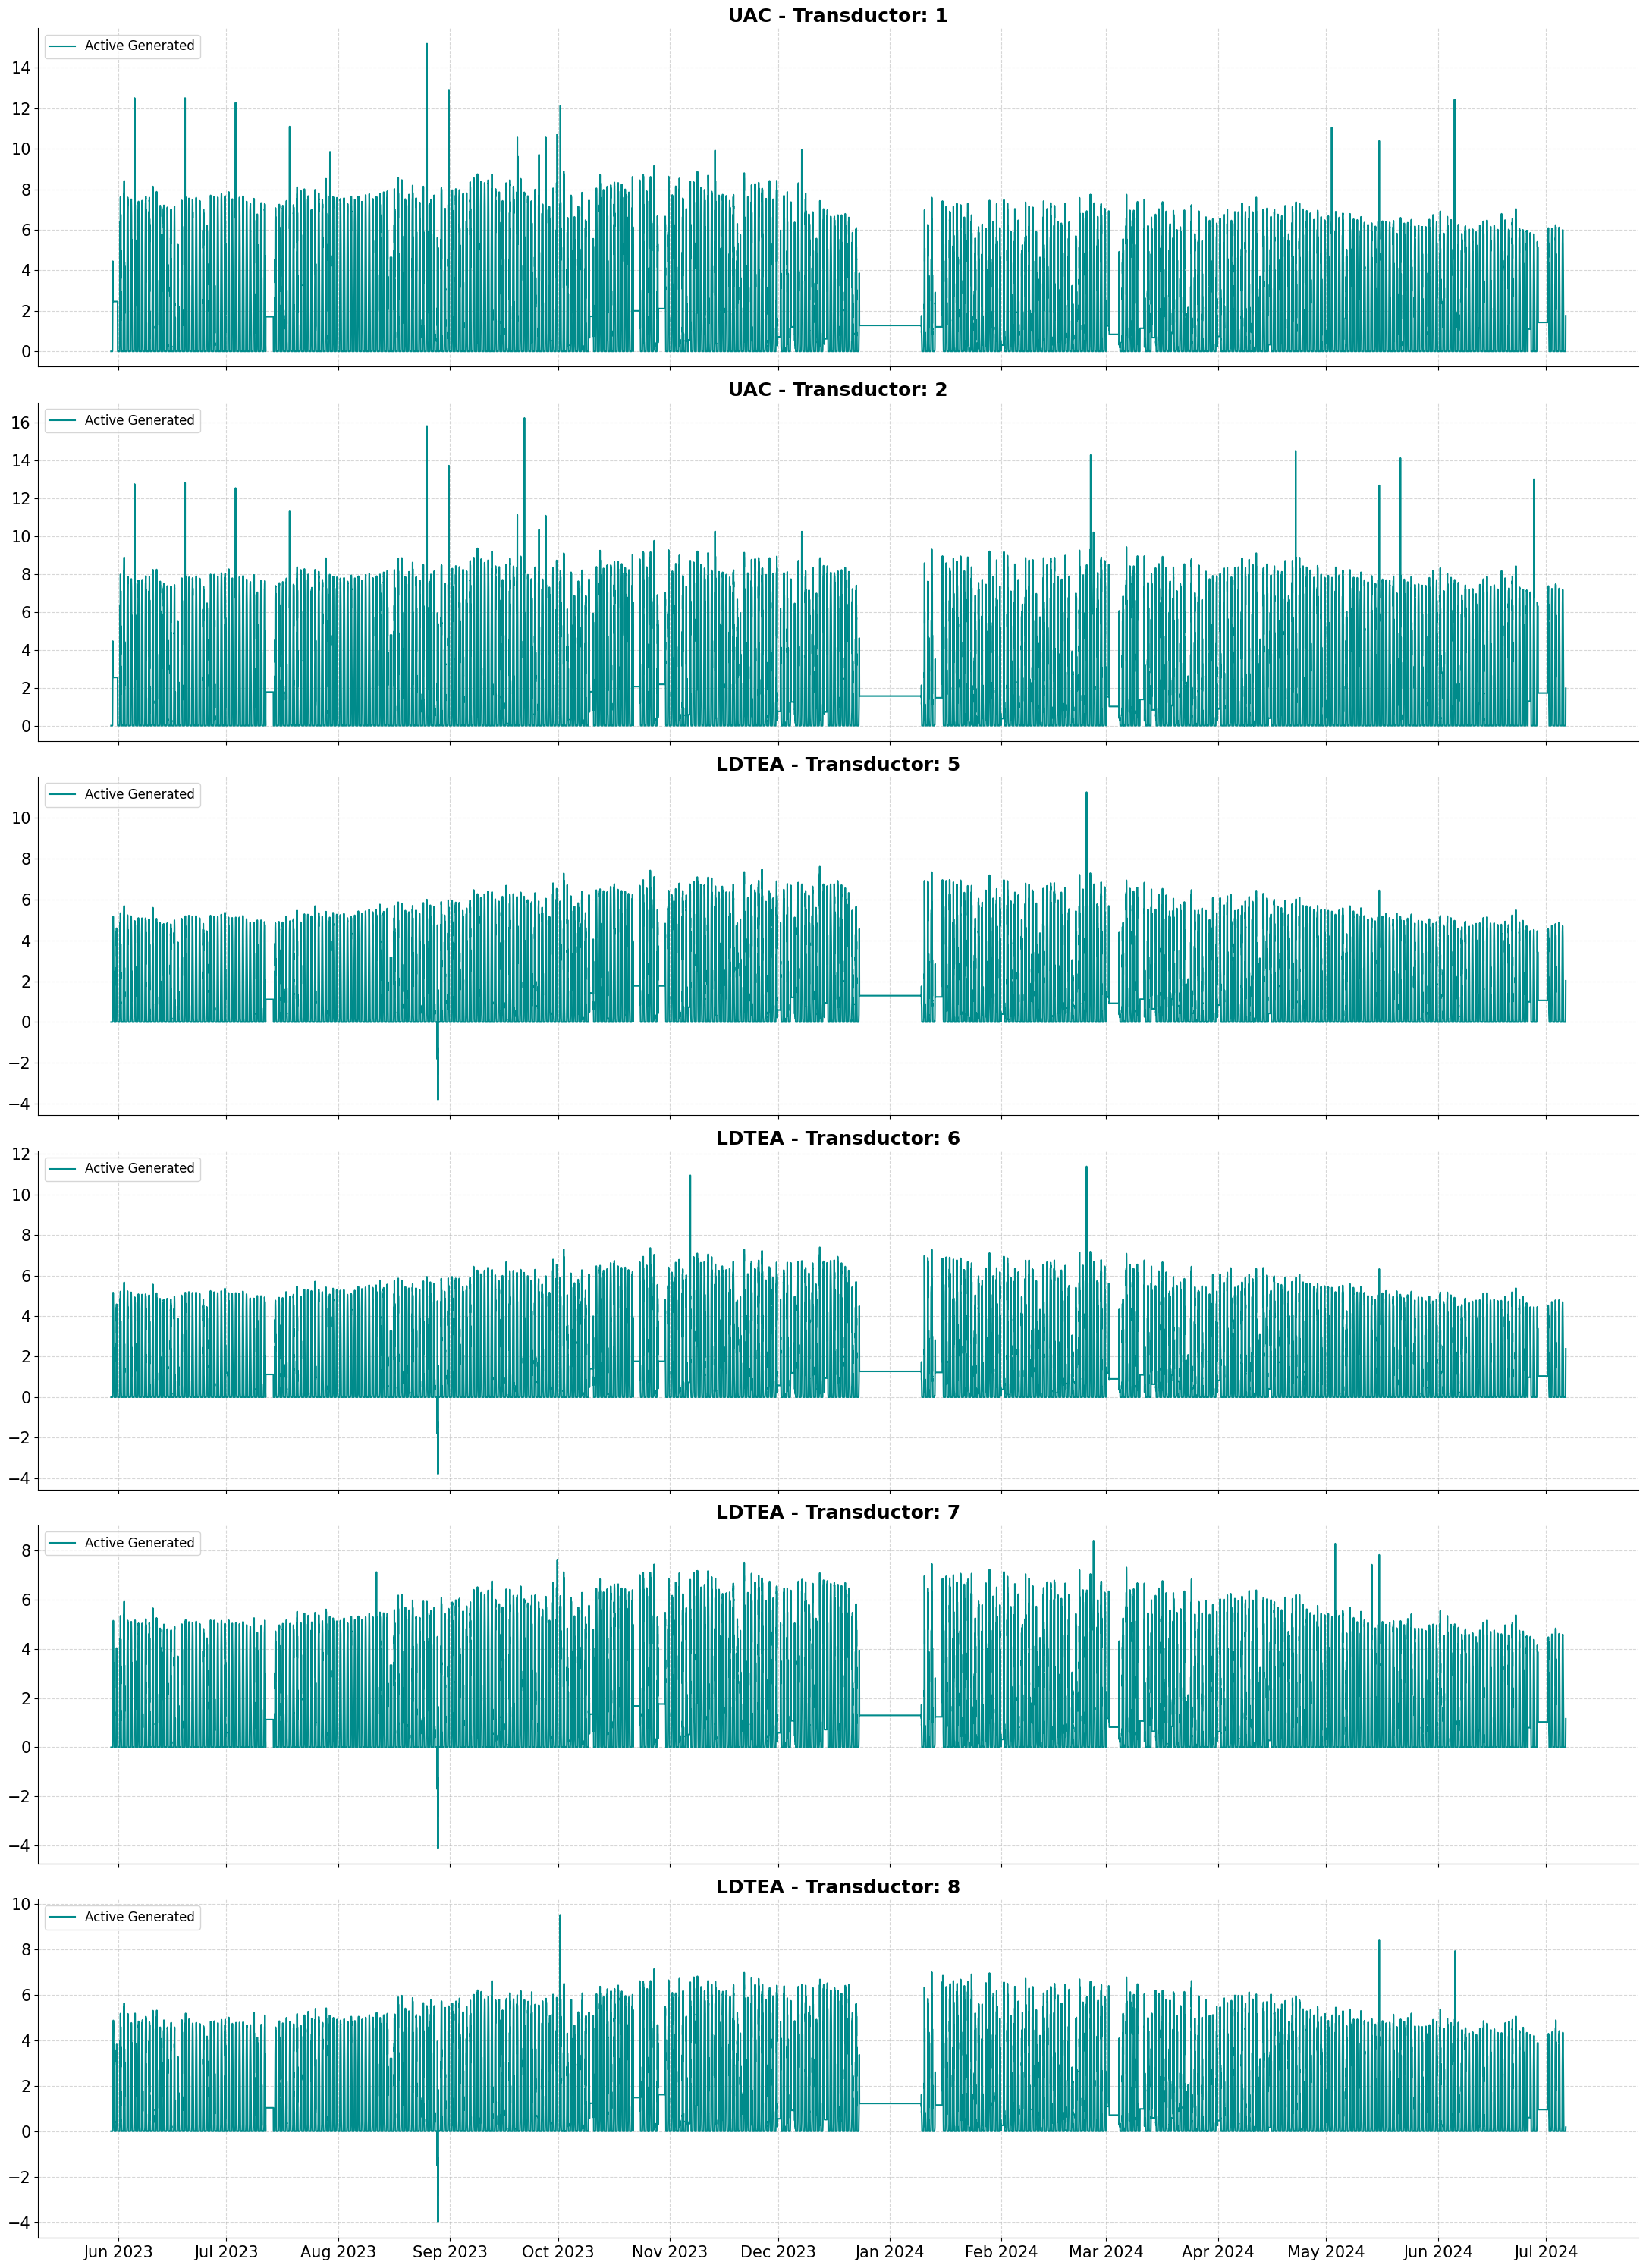

In [10]:
groups = df.groupby("transductor_id")
n_groups = len(groups)

fig, axes = plt.subplots(n_groups, figsize=(22, 5 * n_groups), sharex=True)
if n_groups == 1:
    axes = [axes]

for (name, group), ax in zip(groups, axes):
    sns.lineplot(
        data=group,
        x=group.index,
        y="active_generated",
        ax=ax,
        label="Active Generated",
        color="darkcyan",
    )

    building = group["building"].unique()
    ax.set_title(f"{building[0]} - Transductor: {name}", fontsize=18, fontweight="bold")
    ax.legend(loc="upper left", fontsize=12)

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(True, which="both", alpha=0.5, linestyle="--", linewidth=0.8)

plt.tight_layout()
plt.show()

In [11]:
# Salvar arquivo csv
df.to_csv("../data/clean/0.0_production_sige_pt15m_pre.csv")